In [1]:
# install the dependencies
!pip install kaggle 

In [3]:
from google.colab import files
files.upload() # load kaggle.json file from your computer

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"balnyaupane","key":"f400380eaeb542b5e57a2f135950b57d"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

#Change the permission
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d balnyaupane/small-diabetic-retinopathy-dataset -p /content

 92% 173M/188M [00:01<00:00, 141MB/s]
100% 188M/188M [00:01<00:00, 164MB/s]


In [6]:
!unzip -uq "/content/small-diabetic-retinopathy-dataset.zip" -d "/content/Dataset1"

In [7]:
import tensorflow as tf
from keras.applications.resnet import ResNet152
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras_preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

from keras import regularizers
from keras.layers import BatchNormalization, GlobalAveragePooling2D,Activation


In [8]:
# image size
img_rows=224
img_colms=224

# loading ResNet50 model
# include_top: whether to include the fully-connected layers at the top of the network.
model=ResNet152(weights='imagenet', include_top=False, input_shape=(img_rows,img_colms,3))

234708992/234698864 [==============================] - 2s 0us/step


In [ ]:
# Layers in ResNet152 midel
#for (i,layer) in enumerate(model.layers):
    #print(str(i)+ " "+layer.__class__.__name__,layer.trainable)

In [ ]:
# layers are by default trainable, so make it non trainable.
for layer in model.layers:
    layer.trainable=False
    
# lets check the layer become trainable=Fale or Not.
#for (i,layer) in enumerate(model.layers):
    #print(str(i)+ " "+layer.__class__.__name__,layer.trainable)

In [ ]:
#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='ResNet152.png')

In [ ]:
# Now adding fully connected Layer on the ResNet152
flatLayer=model.output
flatLayer

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'dense_4')>

In [ ]:
#flatLayer = GlobalAveragePooling2D()(flatLayer)
fullConnected=Flatten()(flatLayer)
fullConnected

<KerasTensor: shape=(None, 5) dtype=float32 (created by layer 'flatten_3')>

In [ ]:
# Now adding fully connected Layer on the ResNet152
flatLayer=model.output
#flatLayer = GlobalAveragePooling2D()(flatLayer)
fullConnected=Flatten()(flatLayer)


fullConnected=Dense(16,kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-4))(fullConnected)
fullConnected=BatchNormalization()(fullConnected)
fullConnected=Activation(activation='relu')(fullConnected)
fullConnected=Dropout(0.4)(fullConnected)


output=Dense(5, activation='softmax')(fullConnected)

print("model.input:  ",model.input)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# Model summarary
model.summary()

model.input:   KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalizat

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.00015,beta_1=0.899,beta_2=0.999,epsilon=1e-07)

# Compile the Model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# trainData_Gen= ImageDataGenerator(rescale=1.0/255.0)

trainData_Gen= ImageDataGenerator()
traindata = trainData_Gen.flow_from_directory(
    directory="/content/Dataset1/Diabetic_Retinopathy/training_set",
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical')

print("trainData.class_indices:   ",traindata.class_indices)

testData_Gen= ImageDataGenerator()
testdata = testData_Gen.flow_from_directory(
      directory="/content/Dataset1/Diabetic_Retinopathy/test_set",
      target_size=(224,224),
      batch_size=32,
      class_mode='categorical')

print("testdata.class_indices:   ",testdata.class_indices)

Found 1499 images belonging to 5 classes.
trainData.class_indices:    {'0_No_DR': 0, '1_Mild': 1, '2_Moderate': 2, '3_Severe': 3, '4_Proliferate_DR': 4}
Found 440 images belonging to 5 classes.
testdata.class_indices:    {'0_No_DR': 0, '1_Mild': 1, '2_Moderate': 2, '3_Severe': 3, '4_Proliferate_DR': 4}


In [ ]:
History = model.fit(traindata, 
                    validation_data= testdata, 
                    steps_per_epoch=24,
                    epochs=200,
                    validation_steps=14,
                    verbose=1
                 )

Epoch 1/200
24/24 [==============================] - 78s 2s/step - loss: 44.2128 - accuracy: 0.3529 - val_loss: 25.6955 - val_accuracy: 0.5341
Epoch 2/200
24/24 [==============================] - 33s 1s/step - loss: 15.3423 - accuracy: 0.4236 - val_loss: 7.4538 - val_accuracy: 0.5477
Epoch 3/200
24/24 [==============================] - 33s 1s/step - loss: 5.4787 - accuracy: 0.4930 - val_loss: 3.8331 - val_accuracy: 0.5977
Epoch 4/200
24/24 [==============================] - 33s 1s/step - loss: 3.3020 - accuracy: 0.5137 - val_loss: 2.9031 - val_accuracy: 0.5932
Epoch 5/200
24/24 [==============================] - 33s 1s/step - loss: 2.7240 - accuracy: 0.5457 - val_loss: 2.5650 - val_accuracy: 0.6000
Epoch 6/200
24/24 [==============================] - 33s 1s/step - loss: 2.5484 - accuracy: 0.5150 - val_loss: 2.4758 - val_accuracy: 0.5818
Epoch 7/200
24/24 [==============================] - 33s 1s/step - loss: 2.4024 - accuracy: 0.5364 - val_loss: 2.3311 - val_accuracy: 0.5773
Epoch 8/20

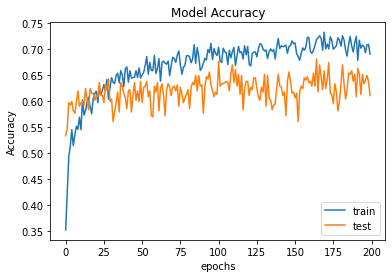

In [ ]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

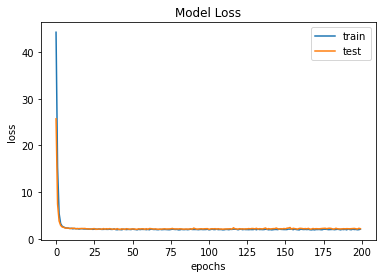

In [ ]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# Now adding fully connected Layer on the ResNet101
flatLayer=model.output
#flatLayer = GlobalAveragePooling2D()(flatLayer)
fullConnected=Flatten()(flatLayer)

fullConnected=Dense(32,kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-4))(fullConnected)
fullConnected=BatchNormalization()(fullConnected)
fullConnected=Activation(activation='relu')(fullConnected)
fullConnected=Dropout(0.5)(fullConnected)

fullConnected=Dense(16,kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-4))(fullConnected)
fullConnected=BatchNormalization()(fullConnected)
fullConnected=Activation(activation='relu')(fullConnected)
fullConnected=Dropout(0.5)(fullConnected)


output=Dense(5, activation='softmax')(fullConnected)

print("model.input:  ",model.input)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# Model summarary
#model.summary()

from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.000025,beta_1=0.899,beta_2=0.999,epsilon=1e-07)

# Compile the Model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# trainData_Gen= ImageDataGenerator(rescale=1.0/255.0)

trainData_Gen= ImageDataGenerator()
traindata = trainData_Gen.flow_from_directory(
    directory="/content/Dataset1/Diabetic_Retinopathy/training_set",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical')

print("trainData.class_indices:   ",traindata.class_indices)

testData_Gen= ImageDataGenerator()
testdata = testData_Gen.flow_from_directory(
      directory="/content/Dataset1/Diabetic_Retinopathy/test_set",
      target_size=(224,224),
      batch_size=16,
      class_mode='categorical')

print("testdata.class_indices:   ",testdata.class_indices)

History = model.fit(traindata, 
                    validation_data= testdata, 
                    steps_per_epoch=47,
                    epochs=250,
                    validation_steps=28,
                    verbose=1
                 )

model.input:   KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Found 1499 images belonging to 5 classes.
trainData.class_indices:    {'0_No_DR': 0, '1_Mild': 1, '2_Moderate': 2, '3_Severe': 3, '4_Proliferate_DR': 4}
Found 440 images belonging to 5 classes.
testdata.class_indices:    {'0_No_DR': 0, '1_Mild': 1, '2_Moderate': 2, '3_Severe': 3, '4_Proliferate_DR': 4}
Epoch 1/250
47/47 [==============================] - 77s 833ms/step - loss: 113.0835 - accuracy: 0.2942 - val_loss: 99.2469 - val_accuracy: 0.4000
Epoch 2/250
47/47 [==============================] - 34s 716ms/step - loss: 87.5490 - accuracy: 0.3356 - val_loss: 75.4056 - val_accuracy: 0.4386
Epoch 3/250
47/47 [==============================] - 34s 724ms/step - loss: 65.4567 - accuracy: 0.3369 - val_loss: 55.2238 - val_accuracy: 0.5023
Epoch 4/250
47/47 [==============================] - 34s 724ms/step - loss: 47.1415 - acc

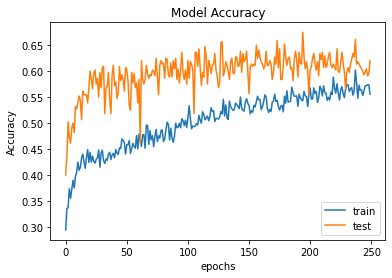

In [ ]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

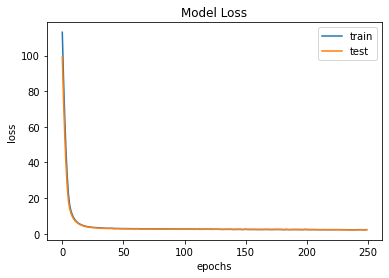

In [ ]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# Now adding fully connected Layer on the ResNet101
flatLayer=model.output
#flatLayer = GlobalAveragePooling2D()(flatLayer)
fullConnected=Flatten()(flatLayer)

fullConnected=Dense(32,kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-4))(fullConnected)
fullConnected=BatchNormalization()(fullConnected)
fullConnected=Activation(activation='relu')(fullConnected)
fullConnected=Dropout(0.5)(fullConnected)

fullConnected=Dense(16,kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-4))(fullConnected)
fullConnected=BatchNormalization()(fullConnected)
fullConnected=Activation(activation='relu')(fullConnected)
fullConnected=Dropout(0.5)(fullConnected)


output=Dense(5, activation='softmax')(fullConnected)

print("model.input:  ",model.input)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# Model summarary
#model.summary()

from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.00075,beta_1=0.899,beta_2=0.999,epsilon=1e-07)

# Compile the Model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# trainData_Gen= ImageDataGenerator(rescale=1.0/255.0)

trainData_Gen= ImageDataGenerator()
traindata = trainData_Gen.flow_from_directory(
    directory="/content/Dataset1/Diabetic_Retinopathy/training_set",
    target_size=(224,224),
    batch_size=64,
    class_mode='categorical')

print("trainData.class_indices:   ",traindata.class_indices)

testData_Gen= ImageDataGenerator()
testdata = testData_Gen.flow_from_directory(
      directory="/content/Dataset1/Diabetic_Retinopathy/test_set",
      target_size=(224,224),
      batch_size=32,
      class_mode='categorical')

print("testdata.class_indices:   ",testdata.class_indices)

History = model.fit(traindata, 
                    validation_data= testdata, 
                    steps_per_epoch=24,
                    epochs=150,
                    validation_steps=14,
                    verbose=1
                 )

model.input:   KerasTensor(type_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Found 1499 images belonging to 5 classes.
trainData.class_indices:    {'0_No_DR': 0, '1_Mild': 1, '2_Moderate': 2, '3_Severe': 3, '4_Proliferate_DR': 4}
Found 440 images belonging to 5 classes.
testdata.class_indices:    {'0_No_DR': 0, '1_Mild': 1, '2_Moderate': 2, '3_Severe': 3, '4_Proliferate_DR': 4}
Epoch 1/150
24/24 [==============================] - 48s 1s/step - loss: 14.5677 - accuracy: 0.2228 - val_loss: 9.8885 - val_accuracy: 0.2023
Epoch 2/150
24/24 [==============================] - 31s 1s/step - loss: 9.4713 - accuracy: 0.2448 - val_loss: 8.4686 - val_accuracy: 0.2932
Epoch 3/150
24/24 [==============================] - 31s 1s/step - loss: 8.7850 - accuracy: 0.2622 - val_loss: 8.5131 - val_accuracy: 0.3455
Epoch 4/150
24/24 [==============================] - 31s 1s/step - loss: 8.4883 - accuracy: 0.2809 - val

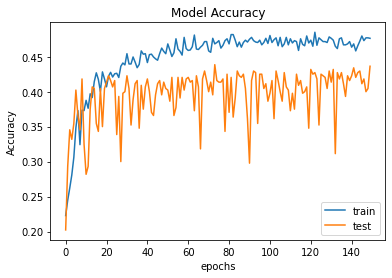

In [ ]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

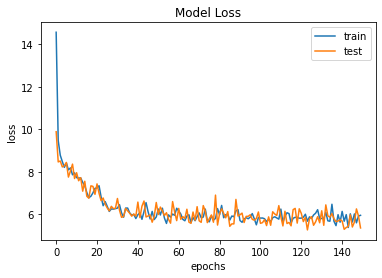

In [ ]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
# making all layer trainable
for layer in model.layers:
    layer.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = 455
# Freeze all the layers before the `fine_tune_at` layer
for layer in model.layers[:fine_tune_at]:
  layer.trainable =  False

# lets check the layer become trainable=Fale or Not.
for (i,layer) in enumerate(model.layers):
    print(str(i)+ " "+layer.__class__.__name__,layer.trainable)


flatLayer=model.output
#flatLayer = GlobalAveragePooling2D()(flatLayer)
fullConnected=Flatten()(flatLayer)

fullConnected=Dense(16,kernel_regularizer=regularizers.l1_l2(l1=1e-2, l2=1e-4))(fullConnected)
fullConnected=BatchNormalization()(fullConnected)
fullConnected=Activation(activation='relu')(fullConnected)
fullConnected=Dropout(0.5)(fullConnected)


output=Dense(5, activation='softmax')(fullConnected)

print("model.input:  ",model.input)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# Model summarary
model.summary()

from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.00075,beta_1=0.899,beta_2=0.999,epsilon=1e-07)

# Compile the Model
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
# trainData_Gen= ImageDataGenerator(rescale=1.0/255.0)

trainData_Gen= ImageDataGenerator()
traindata = trainData_Gen.flow_from_directory(
    directory="/content/Dataset1/Diabetic_Retinopathy/training_set",
    target_size=(224,224),
    batch_size=32,
    class_mode='categorical')

print("trainData.class_indices:   ",traindata.class_indices)

testData_Gen= ImageDataGenerator()
testdata = testData_Gen.flow_from_directory(
      directory="/content/Dataset1/Diabetic_Retinopathy/test_set",
      target_size=(224,224),
      batch_size=16,
      class_mode='categorical')

print("testdata.class_indices:   ",testdata.class_indices)

History = model.fit(traindata, 
                    validation_data= testdata, 
                    steps_per_epoch=47,
                    epochs=100,
                    validation_steps=28,
                    verbose=1
                 )

0 InputLayer False
1 ZeroPadding2D False
2 Conv2D False
3 BatchNormalization False
4 Activation False
5 ZeroPadding2D False
6 MaxPooling2D False
7 Conv2D False
8 BatchNormalization False
9 Activation False
10 Conv2D False
11 BatchNormalization False
12 Activation False
13 Conv2D False
14 Conv2D False
15 BatchNormalization False
16 BatchNormalization False
17 Add False
18 Activation False
19 Conv2D False
20 BatchNormalization False
21 Activation False
22 Conv2D False
23 BatchNormalization False
24 Activation False
25 Conv2D False
26 BatchNormalization False
27 Add False
28 Activation False
29 Conv2D False
30 BatchNormalization False
31 Activation False
32 Conv2D False
33 BatchNormalization False
34 Activation False
35 Conv2D False
36 BatchNormalization False
37 Add False
38 Activation False
39 Conv2D False
40 BatchNormalization False
41 Activation False
42 Conv2D False
43 BatchNormalization False
44 Activation False
45 Conv2D False
46 Conv2D False
47 BatchNormalization False
48 BatchNor

In [ ]:
# summarize history for accuracy
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

In [ ]:
# summarize history for loss
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()